In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd 

In [77]:
df = pd.read_csv('../raw_data/metadata_clean.csv')
lon, lat = df['lon'], df['lat']
print df.head(10)

   Unnamed: 0  mote_id  site_id  node_id        lat         lon  elevation  \
0           0        1        1        1  38.805000 -120.214996     2300.0   
1           1        2        1        2  38.803001 -120.218002     2309.0   
2           2        3        1        3  38.806839 -120.217484     2244.0   
3           3        4        1        4  38.807999 -120.209999     2269.0   
4           4        5        1        5  38.808998 -120.213997     2258.0   
5           5        6        1        6  38.803883 -120.210213     2221.0   
6           6        7        1        7  38.804901 -120.217194     2296.0   
7           7        8        1        8  38.802834 -120.209862     2210.0   
8           8        9        1        9  38.801453 -120.210548     2232.0   
9           9       10        1       10  38.802715 -120.216469     2306.0   

     put_time     mac sd_last_update   server_last_update  \
0  2016-03-07  383b8a            NaN  2016-05-11 06:00:00   
1  2016-03-07  383b

(-121.0016666667, 40.001666666664136)
[-121.0016666667, -119.99833333336586, 37.99499999999586, 40.001666666664136]


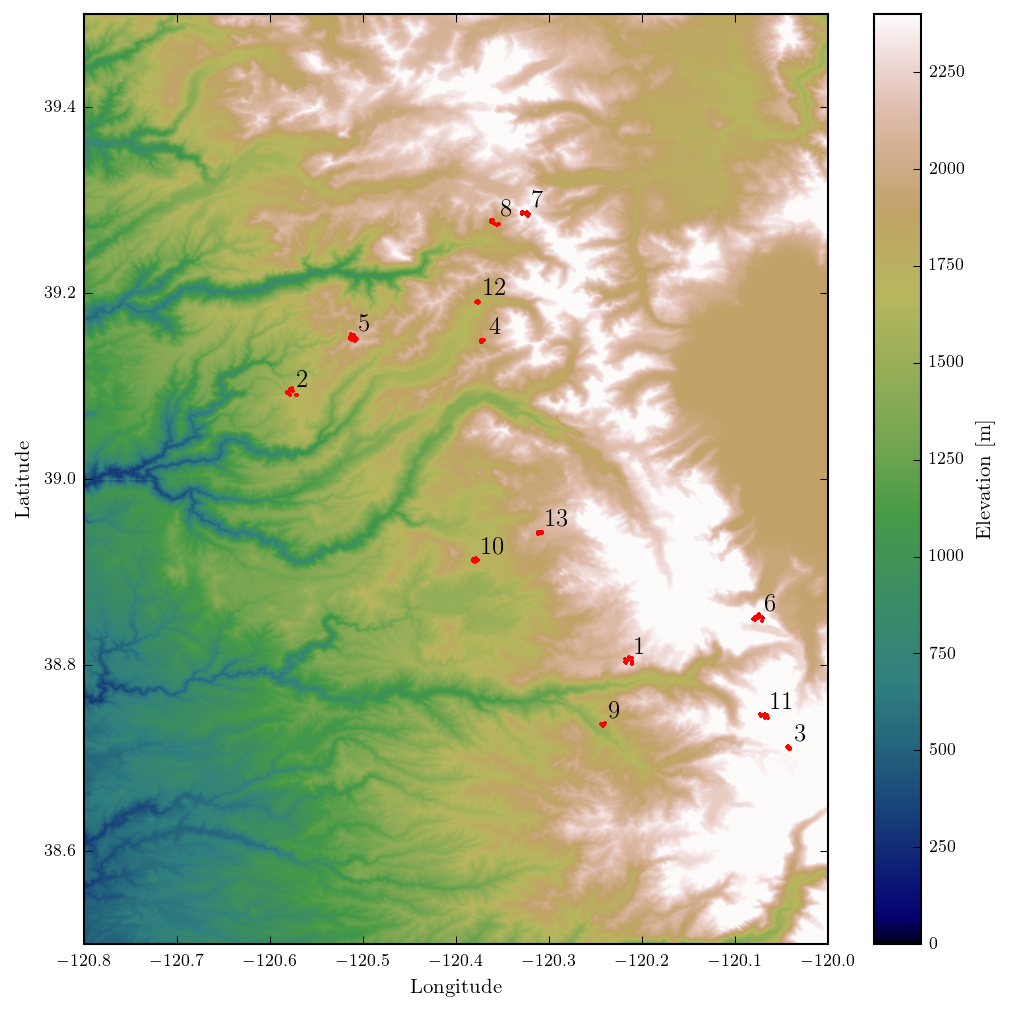

In [11]:
from osgeo import gdal
dataset1 = gdal.Open('../maps/grdn40w121_1/w001001.adf')
dataset2 = gdal.Open('../maps/grdn39w121_1/w001001.adf')
#dataset2 = gdal.Open('../maps/grdn38w121_1/w001001.adf')
dataset = np.append(dataset1.ReadAsArray(), dataset2.ReadAsArray(), axis=0,)
plt.figure(figsize=(8,8))
geotransform = dataset1.GetGeoTransform()
origin = geotransform[0], geotransform[3]
dlon, dlat = geotransform[1], geotransform[5]
print origin

extent = [origin[0], origin[0]+dlon*dataset.shape[1], origin[1]+dlat*dataset.shape[0], origin[1]]
print extent 

im = plt.imshow(dataset,
                extent=extent,
                aspect=1, cmap='gist_earth', vmin=0, vmax=2400 )
plt.colorbar(label='Elevation [m]')

lon, lat = df['lon'], df['lat']
plt.scatter(lon, lat, s=5, c='r', marker='+')
plt.xlim(-120.8, -120 )
plt.ylim(38.5, 39.5)
plt.gca().ticklabel_format(useOffset=False)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

n_sites = df['site_id'].max() 
for i_site in range(1, n_sites+1):
    idx = df['site_id']==i_site
    lats, lons = df['lat'][idx], df['lon'][idx]
    mean_lon, mean_lat = np.mean(lons), np.mean(lats)
    plt.text(mean_lon+.007, mean_lat+.007, '%i'%i_site)


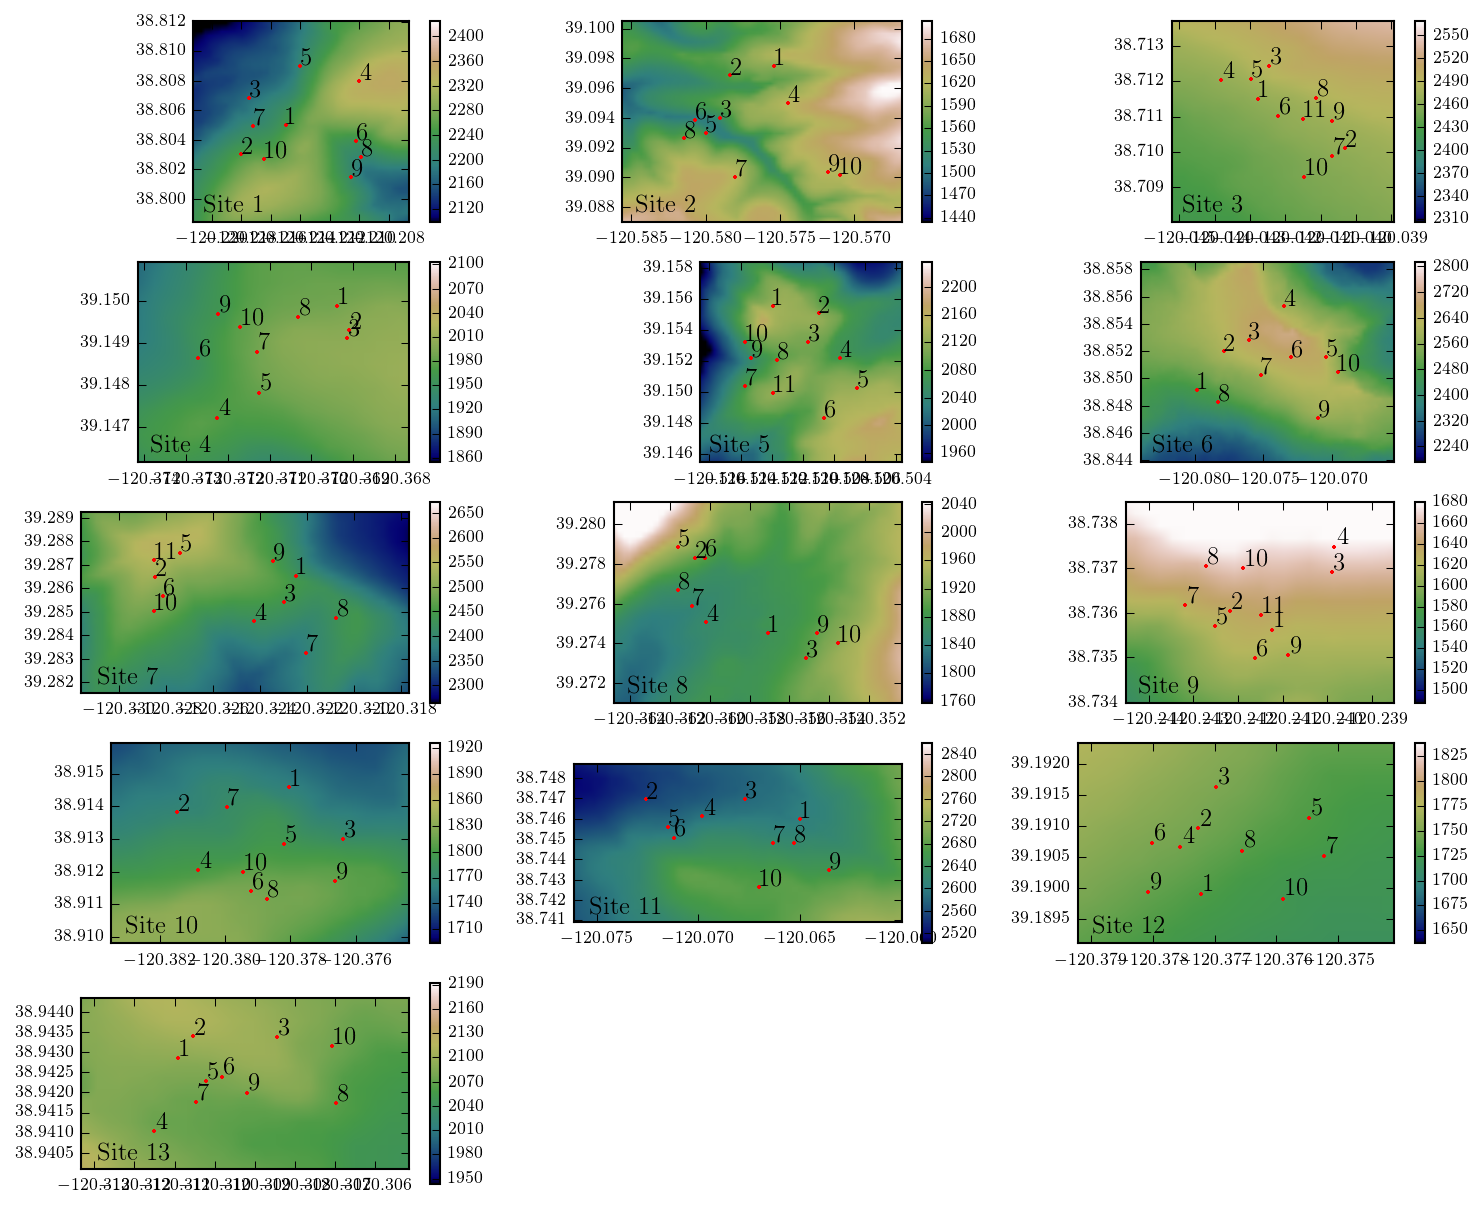

In [78]:
plt.figure(figsize=(12,10))

n_sites = df['site_id'].max() 
for i_site in range(1, n_sites+1):
    plt.subplot(5, 3, i_site)
    idx = df['site_id']==i_site
    
    lats, lons = df['lat'][idx], df['lon'][idx]
    
    # Read out the metadata.
    geotransform = dataset1.GetGeoTransform()
    origin = geotransform[0], geotransform[3]
    dlon, dlat = geotransform[1], geotransform[5]
    
    # Plot the topographical data 
    im = plt.imshow(dataset, extent=extent, aspect=1, cmap='gist_earth', 
                    vmin=df['elevation'][idx].min()*.95, vmax=df['elevation'][idx].max()*1.05 )
    plt.colorbar()

    lon, lat = lons[idx], lats[idx]
    plt.scatter(lon, lat, s=5, c='r', marker='+')
    dlon_total = lon.max()-lon.min()
    dlat_total = lat.max()-lat.min()
    
    plt.xlim(lon.min()-.4*dlon_total, lon.max()+.4*dlon_total)
    plt.ylim(lat.min()-.4*dlat_total, lat.max()+.4*dlat_total)
    plt.gca().ticklabel_format(useOffset=False)
    n_sites = df['site_id'].max() 
    
    
    idx = np.where(df['site_id'].values==i_site)[0]
    node_lats, node_lons = df['lat'][idx].values, df['lon'][idx].values
    
    plt.text(.05, .05, 'Site %i'%(i_site), transform=plt.gca().transAxes)
    
    for i_node in range(0, len(idx)):
        plt.text(node_lons[i_node]+.00005, node_lats[i_node]+.00005, '%i'%(i_node+1))

10
10
11
10
11
10
11
10
11
10
10
10
10


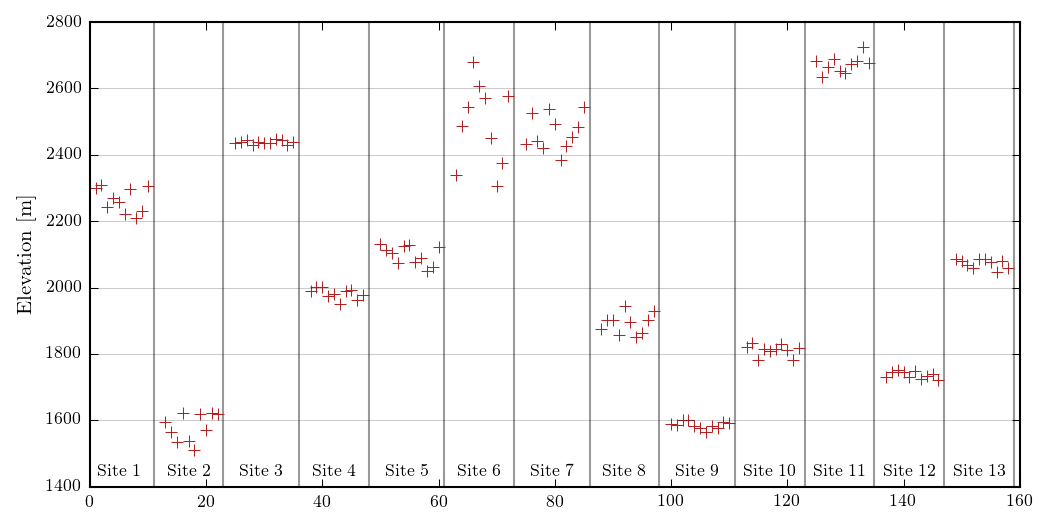

In [79]:
plt.figure(figsize=(8,4))
running_count = 0 
for i_site in range(1, n_sites+1):
    idx = np.where(df['site_id']==i_site)[0]
    node_count = len(idx) 
    plt.plot(range(running_count+1, running_count+len(idx)+1), df['elevation'].values[idx],
             ls='', marker='+', color='firebrick', markersize=6)
    running_count += node_count + 1
    plt.vlines(running_count, 1400,2800,alpha=.4)
    plt.text(running_count-.5*(node_count+2), 1430, 'Site %i'%i_site, horizontalalignment='center', fontsize=8)
    
    running_count+=1
#     plt.elev
plt.xlim(0,running_count)

plt.grid(axis='y', linestyle='-', alpha=.2)
plt.ylabel('Elevation [m]')